# Data Mining on Airline Data

### Project Data Mining_May/11/2020, SaloniMishra

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline
import datetime, warnings, scipy 
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.preprocessing import LabelEncoder
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")

## Reading Data

In [21]:
df1=pd.read_csv(r"C:\Users\salon\Desktop\DATA SCIENCE\DATA MINING\Project\2006\2006.csv")
df2=pd.read_csv(r"C:\Users\salon\Desktop\DATA SCIENCE\DATA MINING\Project\2006\airports.csv")

## Merging Datasets, checking shape

### The data has 35 variables with more than 7 million data.

In [22]:
df1 = pd.merge(df1, df2, on='Dest')

In [4]:
df1.shape

(7125090, 35)

In [6]:
df1.head(10)

Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
0      1          11          3    743.0         745   1024.0        1018   
1      1          11          3   1053.0        1053   1313.0        1318   
2      1          11          3   1915.0        1915   2110.0        2133   
3      1          11          3   1753.0        1755   1925.0        1933   
4      1          11          3    824.0         832   1015.0        1015   
5      1          11          3    630.0         630    950.0        1021   
6      1          11          3   1555.0        1600   1751.0        1806   
7      1          11          3    657.0         700    902.0         905   
8      1          11          3    627.0         630    959.0        1027   
9      1          11          3    920.0         922   1246.0        1318   

  UniqueCarrier  FlightNum TailNum  ...  WeatherDelay  NASDelay  \
0            US        343  N657AW  ...             0         0   
1            US        613  N834AW  ...             0         0   
2            US        617  N605AW  ...             0         0   
3            US        300  N312AW  ...             0         0   
4            US        765  N309AW  ...             0         0   
5            US        419  N665AW  ...             0         0   
6            US        678  N659AW  ...             0         0   
7            US        856  N837AW  ...             0         0   
8            US         60  N678AW  ...             0         0   
9            US        281  N673AW  ...             0         0   

   SecurityDelay  LateAircraftDelay                                   AIRPORT  \
0              0                  0  Phoenix Sky Harbor International Airport   
1              0                  0  Phoenix Sky Harbor International Airport   
2              0                  0  Phoenix Sky Harbor International Airport   
3              0                  0  Phoenix Sky Harbor International Airport   
4              0                  0  Phoenix Sky Harbor International Airport   
5              0                  0  Phoenix Sky Harbor International Airport   
6              0                  0  Phoenix Sky Harbor International Airport   
7              0                  0  Phoenix Sky Harbor International Airport   
8              0                  0  Phoenix Sky Harbor International Airport   
9              0                  0  Phoenix Sky Harbor International Airport   

      CITY STATE  COUNTRY  LATITUDE  LONGITUDE  
0  Phoenix    AZ      USA  33.43417 -112.00806  
1  Phoenix    AZ      USA  33.43417 -112.00806  
2  Phoenix    AZ      USA  33.43417 -112.00806  
3  Phoenix    AZ      USA  33.43417 -112.00806  
4  Phoenix    AZ      USA  33.43417 -112.00806  
5  Phoenix    AZ      USA  33.43417 -112.00806  
6  Phoenix    AZ      USA  33.43417 -112.00806  
7  Phoenix    AZ      USA  33.43417 -112.00806  
8  Phoenix    AZ      USA  33.43417 -112.00806  
9  Phoenix    AZ      USA  33.43417 -112.00806  

[10 rows x 34 columns]

# Exploratory Data Analysis

## Statistics of all the variables

In [7]:
df1.describe()

Month    DayofMonth     DayOfWeek       DepTime    CRSDepTime  \
count  7.125090e+06  7.125090e+06  7.125090e+06  7.003597e+06  7.125090e+06   
mean   6.562551e+00  1.573058e+01  3.950034e+00  1.339969e+03  1.331862e+03   
std    3.424992e+00  8.786734e+00  1.991941e+00  4.764287e+02  4.624788e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    4.000000e+00  8.000000e+00  2.000000e+00  9.300000e+02  9.300000e+02   
50%    7.000000e+00  1.600000e+01  4.000000e+00  1.330000e+03  1.325000e+03   
75%    1.000000e+01  2.300000e+01  6.000000e+00  1.731000e+03  1.720000e+03   
max    1.200000e+01  3.100000e+01  7.000000e+00  2.930000e+03  2.359000e+03   

            ArrTime    CRSArrTime     FlightNum  ActualElapsedTime  \
count  6.987465e+06  7.125090e+06  7.125090e+06       6.987465e+06   
mean   1.486641e+03  1.495551e+03  2.179660e+03       1.262033e+02   
std    5.008129e+02  4.786805e+02  1.985939e+03       7.133012e+01   
min    1.000000e+00  0.000000e+00  1.000000e+00       5.000000e+00   
25%    1.110000e+03  1.115000e+03  5.830000e+02       7.500000e+01   
50%    1.516000e+03  1.519000e+03  1.489000e+03       1.070000e+02   
75%    1.911000e+03  1.905000e+03  3.402000e+03       1.570000e+02   
max    2.955000e+03  2.359000e+03  9.619000e+03       1.879000e+03   

       CRSElapsedTime  ...       TaxiOut     Cancelled      Diverted  \
count    7.125086e+06  ...  7.125090e+06  7.125090e+06  7.125090e+06   
mean     1.273318e+02  ...  1.573899e+01  1.705143e-02  2.264112e-03   
std      7.032210e+01  ...  1.127423e+01  1.294631e-01  4.752879e-02   
min     -9.700000e+01  ...  0.000000e+00  0.000000e+00  0.000000e+00   
25%      7.600000e+01  ...  1.000000e+01  0.000000e+00  0.000000e+00   
50%      1.090000e+02  ...  1.300000e+01  0.000000e+00  0.000000e+00   
75%      1.570000e+02  ...  1.800000e+01  0.000000e+00  0.000000e+00   
max      1.031000e+03  ...  6.020000e+02  1.000000e+00  1.000000e+00   

       CarrierDelay  WeatherDelay      NASDelay  SecurityDelay  \
count  7.125090e+06  7.125090e+06  7.125090e+06   7.125090e+06   
mean   3.385227e+00  6.754344e-01  3.588997e+00   3.104143e-02   
std    1.878623e+01  8.467557e+00  1.563674e+01   1.278818e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
max    1.666000e+03  1.163000e+03  1.392000e+03   3.540000e+02   

       LateAircraftDelay      LATITUDE     LONGITUDE  
count       7.125090e+06  7.125090e+06  7.125090e+06  
mean        4.518584e+00  3.682915e+01 -9.517015e+01  
std         1.986962e+01  5.712461e+00  1.814254e+01  
min         0.000000e+00  1.770189e+01 -1.766460e+02  
25%         0.000000e+00  3.343417e+01 -1.119778e+02  
50%         0.000000e+00  3.761900e+01 -8.933751e+01  
75%         0.000000e+00  4.078839e+01 -8.131603e+01  
max         1.366000e+03  7.128545e+01 -6.479856e+01  

[8 rows x 25 columns]

## All the data is from USA(one country)

In [86]:
df1.COUNTRY.unique()

array(['USA'], dtype=object)

## Checking variable's data type 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125090 entries, 0 to 7125089
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   FlightNum          int64  
 9   TailNum            object 
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             int64  
 19  TaxiOut            int64  
 20  Cancelled          int64  
 21  CancellationCode   object 
 22  Diverted           int64  
 23  CarrierDelay       int64  
 24  WeatherDelay       int64  
 25  NASDelay          

## Checking for null values 

### Below code suming each variable's null values and as CancellationCode variable has almost all null values I am dropping this variable. After this dropping all null values. 

In [9]:
display(df1.isnull().sum())

Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               121493
CRSDepTime                 0
ArrTime               137625
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     137625
CRSElapsedTime             4
AirTime               137625
ArrDelay              137625
DepDelay              121493
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7003597
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
AIRPORT                    0
CITY                       0
STATE                      0
COUNTRY                    0
LATITUDE                   0
LONGITUDE                  0
dtype: int64

In [23]:
df1=df1.drop(columns=['CancellationCode'])

In [24]:
df1=df1.dropna()

In [25]:
df1.shape

(6987465, 34)

## Below is the distribution(histogram) of the variable distance

### This is right skewed. It is also showing that most of the distances of flights are less than 1000miles.


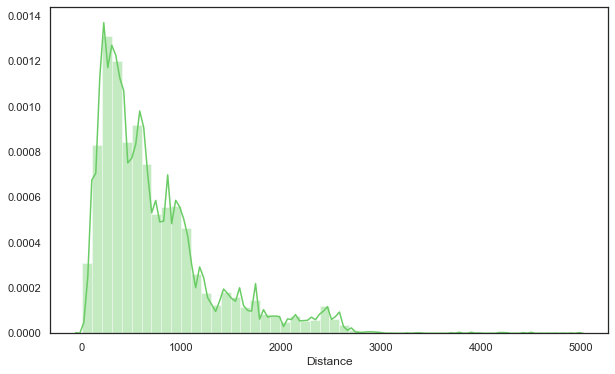

In [26]:
# Distribution Plot ( Histogram)
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, figsize=(10, 6), sharex=True)
sns.distplot(df1.Distance, color="g", ax=axes)

## Unique values of Unique Carriers

### Below we can see there are 19 unique carriers.

#### Unique Carrier codes with Airline Names

Unique Carrier	Airline Name	           
* WN	Southwest Airlines Co.				    
* OO	Skywest Airlines Inc.				    
* AA	American Airlines Inc.				    
* MQ	American Eagle Airlines Inc.		   
* US	US Airways Inc. 				       
* DL	Delta Air Lines Inc.				    
* UA	United Air Lines Inc.				    
* XE	Expressjet Airlines Inc.			   
* NW	Northwest Airlines Inc.				     
* OV	Aeromaritime	
* FL (1)	Frontier Airlines Inc. (1)	
* AS	Alaska Airlines Inc.	
* B6	JetBlue Airways	
* F9	Frontier Airlines Inc.	
* HA	Hawaiian Airlines Inc.	
* AQ	Aloha Airlines Inc.	
* TZ	ATA Airlines 	
* YV	Mesa Airlines Inc.	
* OV	Aeromaritime	


## Here we are looking for the distribution of number of flights by each unique carrier.

### We can see the highest number of flights are from SouthWestern flights where as least are ATA Airlines

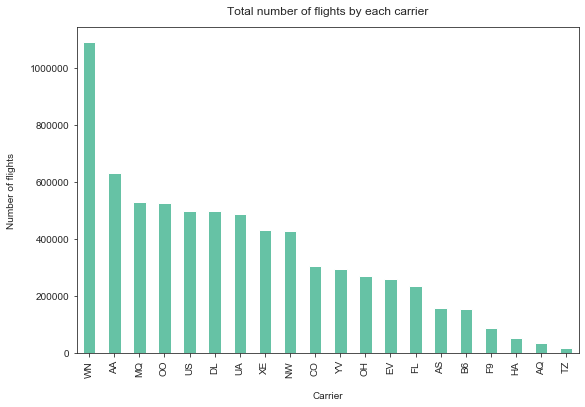

In [83]:
df1['UniqueCarrier'].value_counts().plot(kind='bar', figsize=(9, 6))
plt.xlabel("Carrier", labelpad=14)
plt.ylabel("Number of flights", labelpad=14)
plt.title("Total number of flights by each carrier", y=1.02);

## Below is the pie chart to see the distribution of total flights and Arrived Delay with months.

### We can see that December is the month with the highest number of flights where as Arrived Delays are mera in June and July.

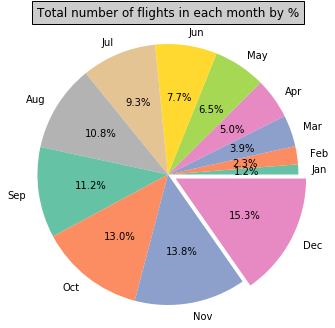

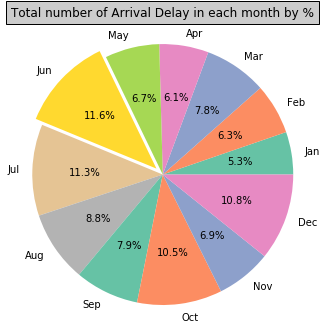

In [15]:
sums = df1.Month.groupby(df1.Month).sum()
#axis('equal');
sums.head(12)
labels='Jan', 'Feb', 'Mar', 'Apr', "May", 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
explode=(0,0,0,0,0,0,0,0,0,0,0,0.1)
plt.pie(sums, labels=labels,explode=explode, autopct='%1.1f%%', radius=1.5)
plt.title("Total number of flights in each month by %",  bbox={'facecolor':'0.8', 'pad':5}, y=1.2)
plt.show()

sums = df1.ArrDelay.groupby(df1.Month).sum()
#axis('equal');
sums.head(12)
labels='Jan', 'Feb', 'Mar', 'Apr', "May", 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
explode=(0,0,0,0,0,0.1,0,0,0,0,0,0)
plt.pie(sums, labels=labels,explode=explode, autopct='%1.1f%%', radius=1.5)
plt.title("Total number of Arrival Delay in each month by %", bbox={'facecolor':'0.8', 'pad':5},y=1.2)
plt.show()

### Similarly, when we see the distribution of flights with day of the week. We can see Sunday has the most flights whereas when we see for Arrival Delays we can see Friday has the most delays.

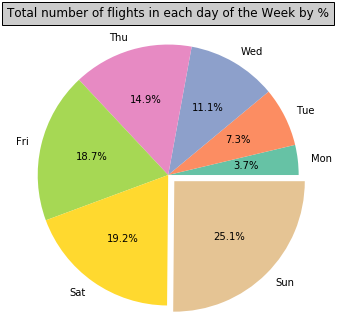

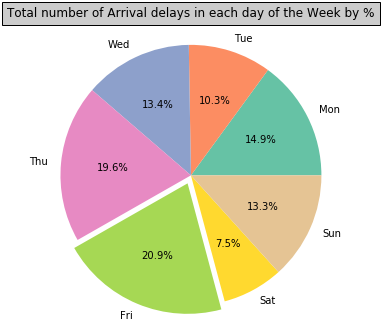

In [16]:
sums = df1.DayOfWeek.groupby(df1.DayOfWeek).sum()
labels='Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'
explode=(0,0,0,0,0,0,0.1)
plt.pie(sums, labels=labels,explode=explode, autopct='%1.1f%%', radius=1.5)
plt.title("Total number of flights in each day of the Week by %",  bbox={'facecolor':'0.8', 'pad':5}, y=1.2)
plt.show()

sums = df1.ArrDelay.groupby(df1.DayOfWeek).sum()
labels='Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'
explode=(0,0,0,0,0.1,0,0)
plt.pie(sums, labels=labels,explode=explode, autopct='%1.1f%%', radius=1.5)
plt.title("Total number of Arrival delays in each day of the Week by %",  bbox={'facecolor':'0.8', 'pad':5}, y=1.2)
plt.show()

# Sunburst Chart with Unique carriers and their respective flights distribution in different satates

### SouthWest Airlines (WN) is most popular in California, Texas, Nevada etc.


In [8]:
%matplotlib notebook
fig = px.sunburst(df1, path=["UniqueCarrier", "STATE"], values='total',
                  color='UniqueCarrier',hover_data=['UniqueCarrier'],
                  color_continuous_scale='RdBu')
fig.show()

## Heatmap to see the correlation between variables

### Arrival delay is more correlated with Departure delay and Airtime.

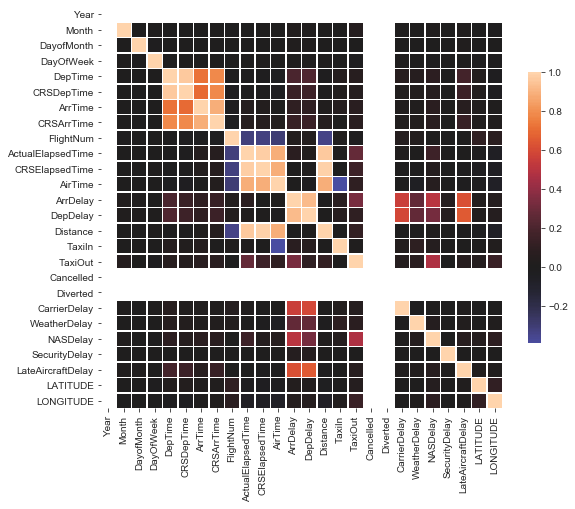

In [84]:
corr = df1.corr() # correlations
plt.figure(figsize=(9, 10))
sns.heatmap(corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Linechart

### Below is the line chart of months vs weather delay by different unique carriers.

#### Here we can see that EV(Atlantic Southeast) has most weather delays in June and September whereas OH(Comair, Inc.) has most delays in June and October. By different carriers, we can see there are many peaks at June.

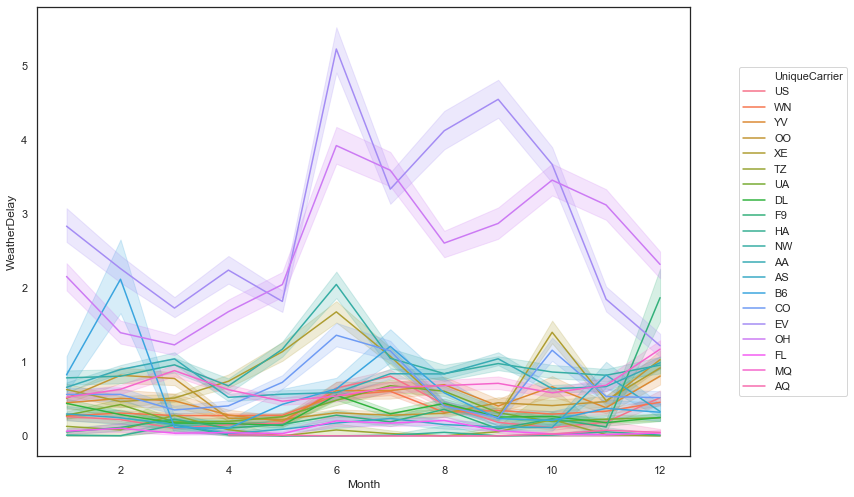

In [45]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
g = sns.lineplot(x="Month", y="WeatherDelay", hue="UniqueCarrier", dashes=False, data=df1, ax=ax)
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)

#### ArrDelay variable, i.e., arrival delay, in minutes. It also has negative values indicating early arrivals. to understand data better, I made a new variable i.e., Range with  6 categorical values. All negative values marked as "early", and others accordingly. Please see below.

In [4]:
print(df1.ArrDelay.min())
print(df1.ArrDelay.max())

-592.0
1779.0


In [5]:
import numpy as np
bins = [-600,0,120,500, 1000,1500, np.inf]
names = ['early','<0', '0-120', '120-500', '500-1000', '1000+']

df1['Range'] = pd.cut(df1['ArrDelay'], bins, labels=names, include_lowest = True)


In [42]:
df1.Range.head(16)


0        <0
1     early
2     early
3     early
4     early
5     early
6     early
7     early
8     early
9     early
10       <0
11    early
12    early
13    early
14       <0
15    early
Name: Range, dtype: category
Categories (6, object): [early < <0 < 0-120 < 120-500 < 500-1000 < 1000+]

## Grouped Bar Chart

#### Grouped bar chart of Unique Carrier vs Arrdelay(Arrival Delay). We can see here in NW(North Western) has most delayed flights.

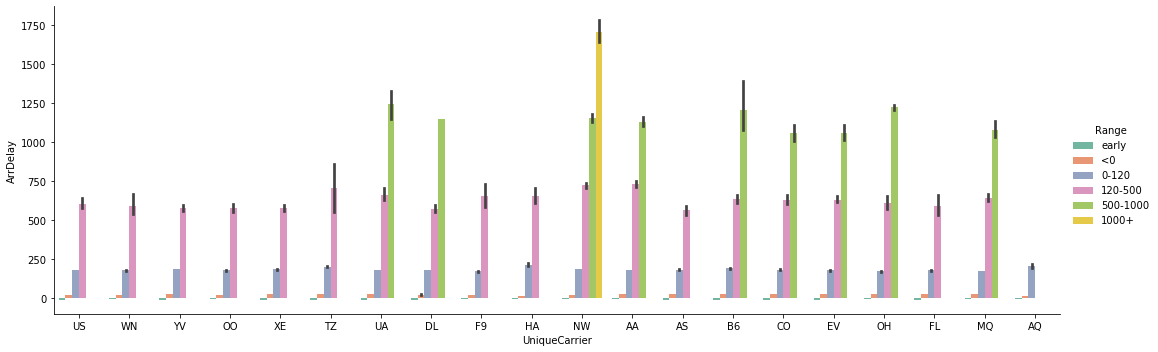

In [6]:
#f = plt.subplots(figsize=(15, 10))
sns.catplot(x="UniqueCarrier", y="ArrDelay", hue="Range",kind="bar", data=df1, height=5, aspect=3);


In [7]:
a=df1[["UniqueCarrier", "Range"]]

In [18]:
a.groupby("Range").count()

UniqueCarrier
Range                  
early           3799187
<0              3047425
0-120            139539
120-500            1152
500-1000            159
1000+                 3

In [8]:
a.to_csv("a.csv")

## Voilin Plot

### Below is the voilin plot in between Range and Distance, as we have perception that if distance is long there might be delays because of that but here we can see Distance has not much to do as there are many flights that arrive early.

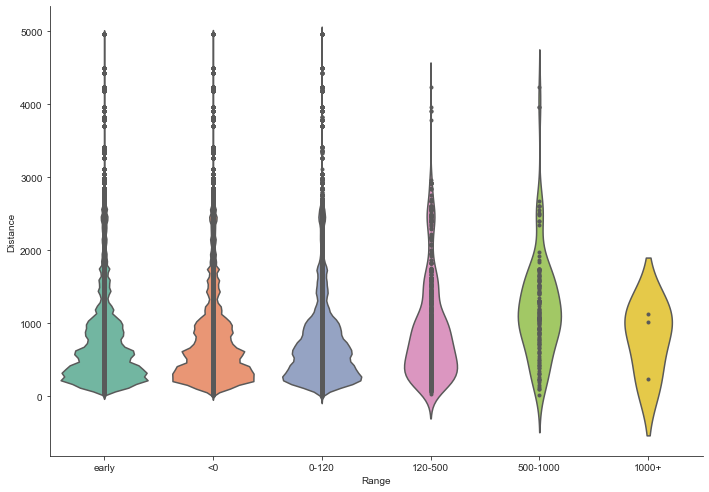

In [55]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=df1, x="Range",y="Distance",  inner="points", ax=ax)    
sns.despine()

In [10]:

bins = [-600,0,120, np.inf]
names = [3, 2,1]

df1['New_Range'] = pd.cut(df1['ArrDelay'], bins, labels=names, include_lowest = True)

In [307]:
df1.UniqueCarrier.count()

6987465

## As the decision trees are very computation extensive and it comes at the cost of long analysis time. Therefore, the need of selecting the UniqueCarrier important for analysis has been realized. Using the frequency distribution of number of flights by UniqueCarrier is used to pick three Unique Carriers with most number of flights to make analysis possible.

### WN, AA, OO has been selected for the further analysis

In [28]:
df1=df1[(df1.UniqueCarrier== "WN") | (df1.UniqueCarrier== "AA")|(df1.UniqueCarrier== "OO")]

In [27]:
df1=df1[(df1.STATE=="NJ")|(df1.STATE=="NY")|(df1.STATE=="PA")|(df1.STATE=="CA")]

In [39]:
X.isnull().sum()

ArrDelay    0
DepDelay    0
AirTime     0
dtype: int64

In [15]:
df1.UniqueCarrier.unique()

array(['WN', 'AA', 'OO'], dtype=object)

In [25]:
df1.shape

(563178, 34)

In [7]:
df1.shape

(153643, 34)

In [57]:
#df3.to_csv("tristate.csv")

## As UniqueCarrier is categorical for further analysis, I got dummied for the Airlines

In [26]:


data = pd.get_dummies(df3,columns=['UniqueCarrier'])
data.head(2)


Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
427189  2006      1          11          3   1752.0        1540   1923.0   
427190  2006      1          11          3    724.0         730    843.0   

        CRSArrTime  FlightNum TailNum  ...  \
427189        1654        127  N105UW  ...   
427190         845        277  N525AU  ...   

                                   AIRPORT          CITY  STATE  COUNTRY  \
427189  Philadelphia International Airport  Philadelphia     PA      USA   
427190  Philadelphia International Airport  Philadelphia     PA      USA   

        LATITUDE LONGITUDE New_Range  UniqueCarrier_AA  UniqueCarrier_DL  \
427189  39.87195 -75.24114         1                 0                 0   
427190  39.87195 -75.24114         3                 0                 0   

        UniqueCarrier_US  
427189                 1  
427190                 1  

[2 rows x 37 columns]

In [10]:
#dfm=df1[["ArrDelay", "DepDelay", "AirTime"]]

## The features related with airline delays are Arrival Delay, Departure Delay and Airtime. Therefore, here I took these.

## Library Sklearn provides train_test_split to split data into training and test set. Here I took 70% data in training set whereas 30% in test set.

In [38]:
X = df1[["ArrDelay", "DepDelay", "AirTime"]] # Features
y = df1.UniqueCarrier # Target variable
train_X, test_X, train_y, test_y=train_test_split(X, y, test_size=0.30, random_state=0)

In [11]:
dm=list(y.unique())
dm

['AA', 'OO', 'WN']

# DECISION TREE

## Before going ahead with decision tree, I tuned the hypreparameters along with criterion. For this I used GridSearchCV, from the analysis I found criterion gini, max depth 3 and max_features 2 will bebest for the model.

In [102]:
param_grid = {'max_depth': np.arange(1,4),
              "criterion":("gini", "entropy"),
              "max_features":np.arange(1,3),
              #"max_leaf_nodes":np.arange(2,12)
               }

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(train_X,train_y)
tree_preds = tree.predict_proba(test_X)[:, 1]

In [58]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.7079131109387122


In [103]:
tree.best_params_
tree.best_score_
df=pd.DataFrame(tree.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.723397      0.008163         0.131602        0.006366   
1        0.734350      0.006484         0.135381        0.006611   
2        0.737467      0.012598         0.141575        0.005625   
3        0.787081      0.005176         0.135663        0.005792   
4        0.768019      0.004386         0.137243        0.006396   
5        0.824660      0.005076         0.133326        0.009813   
6        0.715842      0.012235         0.131705        0.006769   
7        0.731350      0.007103         0.134343        0.007668   
8        0.746452      0.015661         0.135973        0.005663   
9        0.780508      0.007986         0.134600        0.007838   
10       0.767070      0.005041         0.134221        0.002621   
11       0.826425      0.012864         0.134361        0.007649   

   param_criterion param_max_depth param_max_features  \
0             gini               1                  1   
1             gini               1                  2   
2             gini               2                  1   
3             gini               2                  2   
4             gini               3                  1   
5             gini               3                  2   
6          entropy               1                  1   
7          entropy               1                  2   
8          entropy               2                  1   
9          entropy               2                  2   
10         entropy               3                  1   
11         entropy               3                  2   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'max_depth': 1, 'max_fea...           0.577410   
1   {'criterion': 'gini', 'max_depth': 1, 'max_fea...           0.577410   
2   {'criterion': 'gini', 'max_depth': 2, 'max_fea...           0.574393   
3   {'criterion': 'gini', 'max_depth': 2, 'max_fea...           0.710633   
4   {'criterion': 'gini', 'max_depth': 3, 'max_fea...           0.591879   
5   {'criterion': 'gini', 'max_depth': 3, 'max_fea...           0.751070   
6   {'criterion': 'entropy', 'max_depth': 1, 'max_...           0.554244   
7   {'criterion': 'entropy', 'max_depth': 1, 'max_...           0.554244   
8   {'criterion': 'entropy', 'max_depth': 2, 'max_...           0.633193   
9   {'criterion': 'entropy', 'max_depth': 2, 'max_...           0.577733   
10  {'criterion': 'entropy', 'max_depth': 3, 'max_...           0.551165   
11  {'criterion': 'entropy', 'max_depth': 3, 'max_...           0.745528   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.575140           0.574309           0.485261   
1            0.574294           0.577865           0.574771   
2            0.554006           0.626137           0.572847   
3            0.706642           0.709967           0.707843   
4            0.707566           0.547895           0.702455   
5            0.744416           0.613269           0.745555   
6            0.554406           0.553236           0.574771   
7            0.575140           0.553236           0.574771   
8            0.580820           0.646056           0.485261   
9            0.578127           0.709967           0.705565   
10           0.638359           0.544786           0.664435   
11           0.668098           0.676103           0.739460   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.485261         0.539476        0.044278               12  
1            0.573293         0.575527        0.001794                9  
2            0.597383         0.584953        0.024765                8  
3            0.707104         0.708438        0.001582                2  
4            0.620026         0.633964        0.062420                5  
5            0.671485         0.705159        0.054513                3  
6            0.485261         0.544384        0.03

In [106]:
pd.set_option('display.max_colwidth', None)
df[['params','mean_test_score']]


params  \
0      {'criterion': 'gini', 'max_depth': 1, 'max_features': 1}   
1      {'criterion': 'gini', 'max_depth': 1, 'max_features': 2}   
2      {'criterion': 'gini', 'max_depth': 2, 'max_features': 1}   
3      {'criterion': 'gini', 'max_depth': 2, 'max_features': 2}   
4      {'criterion': 'gini', 'max_depth': 3, 'max_features': 1}   
5      {'criterion': 'gini', 'max_depth': 3, 'max_features': 2}   
6   {'criterion': 'entropy', 'max_depth': 1, 'max_features': 1}   
7   {'criterion': 'entropy', 'max_depth': 1, 'max_features': 2}   
8   {'criterion': 'entropy', 'max_depth': 2, 'max_features': 1}   
9   {'criterion': 'entropy', 'max_depth': 2, 'max_features': 2}   
10  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1}   
11  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2}   

    mean_test_score  
0          0.539476  
1          0.575527  
2          0.584953  
3          0.708438  
4          0.633964  
5          0.705159  
6          0.544384  
7          0.562584  
8          0.595359  
9          0.655203  
10         0.621120  
11         0.715112

## From the tuned parameters, I got below decision tree. In the decision model, I got 0.74 score from traing data. When I validated the model I got with 0.7478 accuracy. After this, I also got normalized confusion matrix.

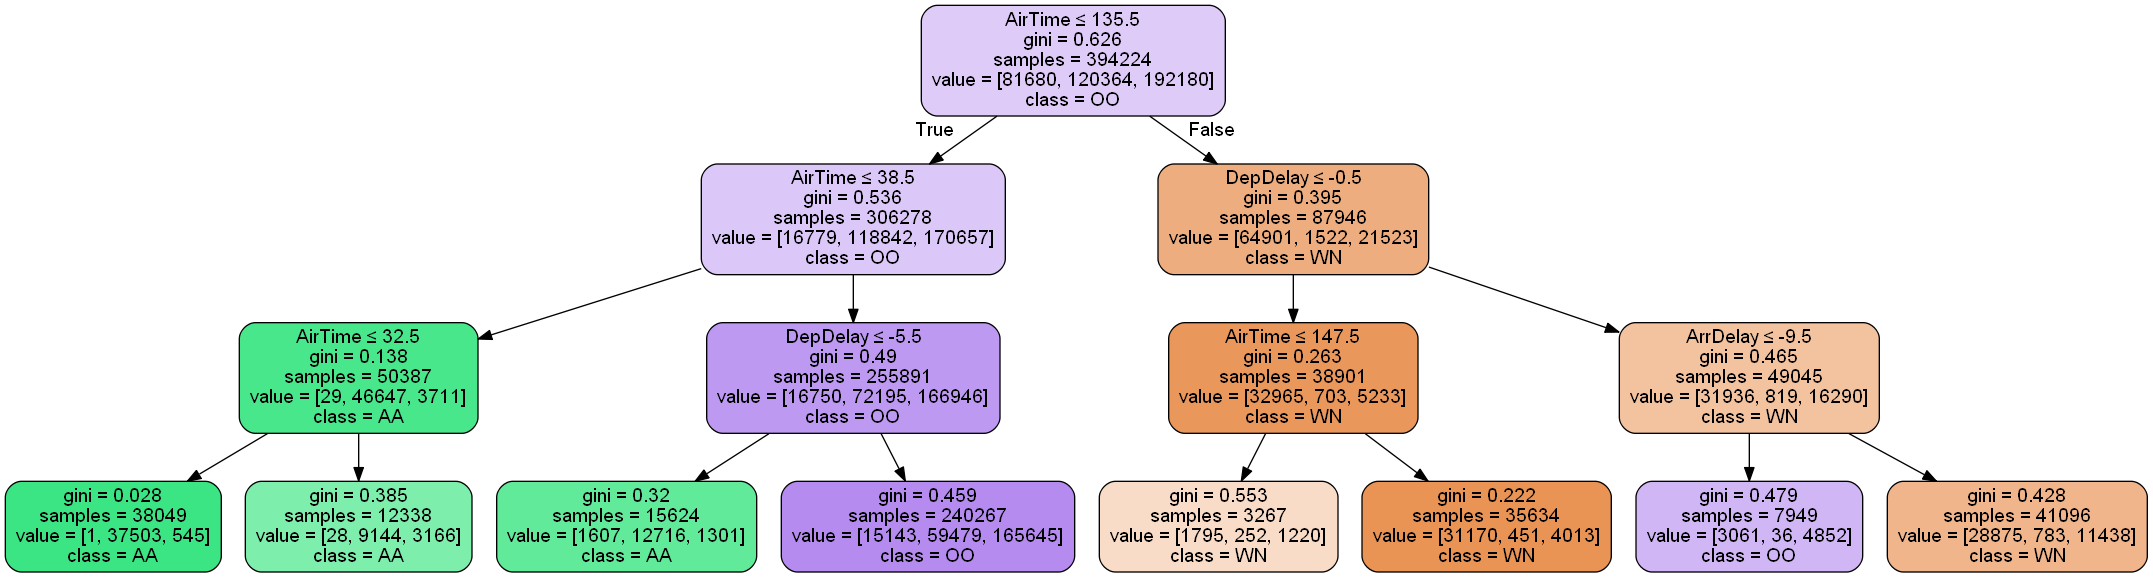

In [51]:
dt_feature_names = list(X.columns)
dm=list(y.unique())
# Create Decision Tree classifer object
train_X, test_X, train_y, test_y=train_test_split(X, y, test_size=0.30, random_state=0)
clf = DecisionTreeClassifier(max_depth = 3,min_samples_split=2, max_leaf_nodes=8)

# Train Decision Tree Classifer
clf = clf.fit(train_X,train_y)
#Predict the response for test dataset
y_pred = clf.predict(test_X)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=dt_feature_names, class_names=dm)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('drm.png')
Image(graph.create_png())

In [53]:
clf.score(train_X, train_y)

0.7399346564389788

In [95]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.7478952963824957


Normalized confusion matrix
[[0.75706696 0.02150629 0.22142675]
 [0.01141034 0.49148628 0.49710338]
 [0.08711484 0.02540497 0.88748019]]


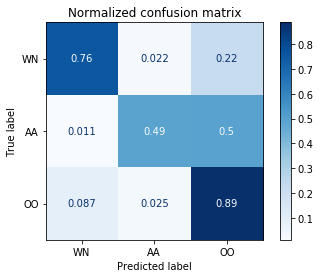

In [54]:
dm=list(y.unique())

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_X, test_y,
                                 display_labels=dm,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

# Random Forest 

## In the Random Forest, I used GridSearchCV and got the parameter's values to use for model. The score for training data is 0.746 whereas validation accuracy is also 0.746.

In [45]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    
    'n_estimators': [10, 100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
grid_search.fit(train_X,train_y)
grid_search.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.8min finished


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 4,
 'n_estimators': 10}

In [56]:
grid_search.score(train_X, train_y)

0.74559133893421

In [47]:
y_pred=grid_search.predict(test_X)

In [48]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.7457592007291926


In [49]:
feature_imp = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.629660
1    0.224074
0    0.146265
dtype: float64

In [285]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y, y_pred)
print(conf_mat)

[[1690  376  130]
 [ 379  840  151]
 [ 119  125  866]]


Normalized confusion matrix
[[0.75181113 0.07062701 0.17756186]
 [0.04110072 0.65510627 0.30379301]
 [0.07858603 0.11605231 0.80536166]]


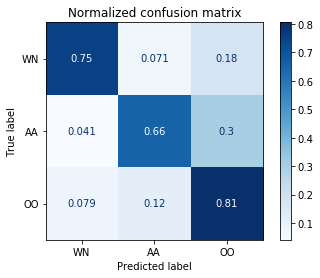

In [50]:

dm=list(y.unique())

titles_options = [
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, test_X, test_y,
                                 display_labels=dm,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

# Support Vector 

### In this for parameter selection, I used RandomSearchCV and GridSearchCV. The training score I got from this model is 0.94 and test set accuracy is 0.74

In [15]:
target=df1.UniqueCarrier
svm = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1],
    'kernel': ['rbf','linear']
}, cv=2, return_train_score=False)
svm.fit(train_X, train_y)
pd.DataFrame(svm.cv_results_)[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       1          rbf         0.559659
1       1       linear         0.697088

In [14]:
from sklearn.model_selection import RandomizedSearchCV
target=df1.UniqueCarrier
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1, 10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=2, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(train_X, train_y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0      10       linear         0.697088
1      10          rbf         0.562678

In [33]:
train_y.unique()

array(['WN', 'AA', 'OO'], dtype=object)

In [19]:
model = svm.SVC(kernel='rbf',C=1,gamma='auto')
model.fit(test_X,test_y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
model.score(train_X, train_y)

0.9393786564454307

In [22]:
y_pred=model.predict(test_X)

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.7399132539842647


Normalized confusion matrix
[[0.87539699 0.00116451 0.12343849]
 [0.46743295 0.11494253 0.41762452]
 [0.35588235 0.00091278 0.64320487]]


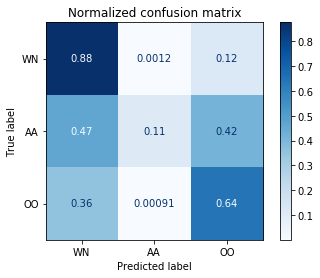

In [24]:
dm=list(y.unique())

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, train_X, train_y,
                                 display_labels=dm,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()